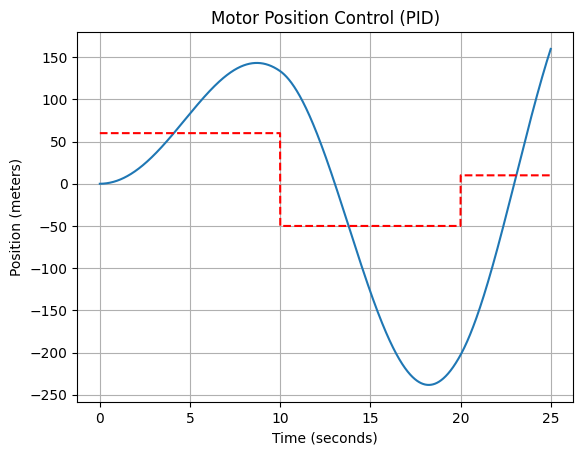

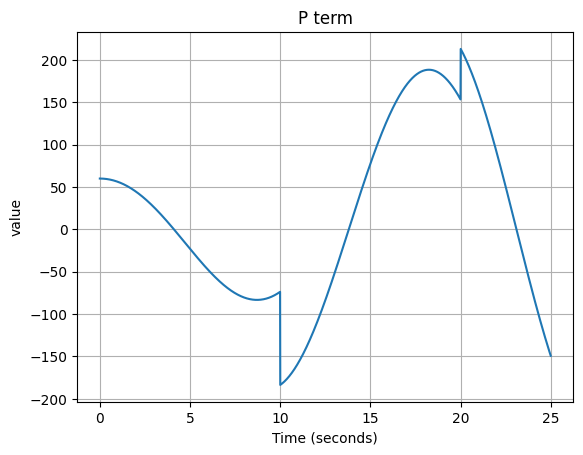

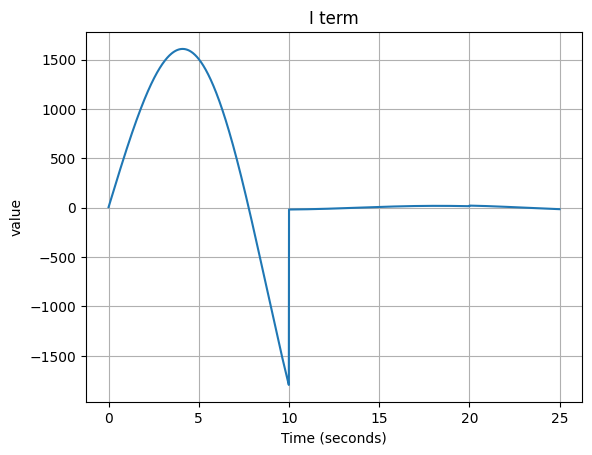

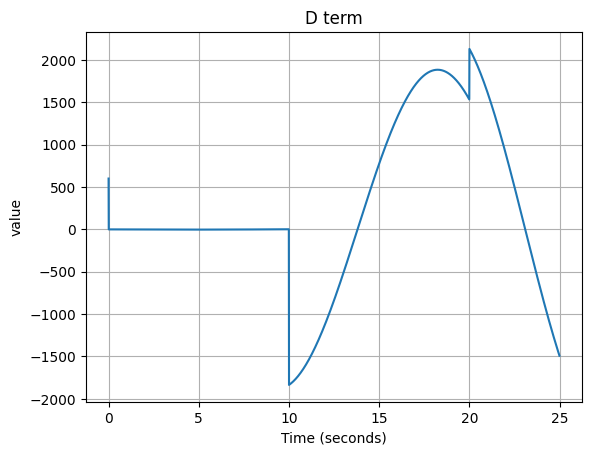

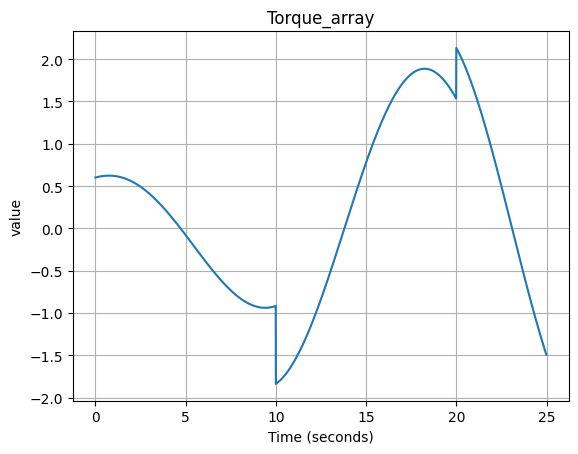

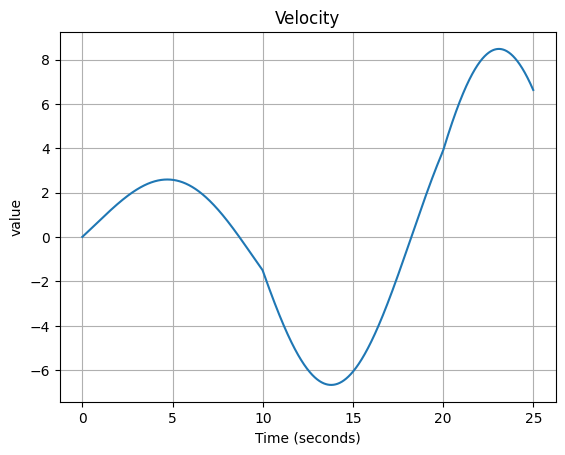

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# PID controller
class PIDController:
    def __init__(self, Kp, Ki, Kd, set_point):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.set_point = set_point
        self.integral = 0
        self.prev_error = 0

    def update(self, measured_value, dt):
        error = self.set_point - measured_value
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output,error,self.integral,derivative
    
    def update_set_point(self, new_set_point, reset_integral=True, reset_derivative=True):
        self.set_point = new_set_point
        if reset_integral:
            self.integral = 0  # Reset the integral term
        if reset_derivative:
            self.prev_error = 0  # Reset previous error, effectively resetting the derivative term


# Motor Control: Control Torque to Achieve Desired Position
def motor_position_control(pid, time_span, motor_radius=2, motor_mass=2, initial_position=0):
    position = initial_position
    velocity = 0
    positions, motor_set_point_array, torque_array, velocitys = [],[],[],[]
    p_term,i_term,d_term = [],[],[]
    dt = 0.1

    # Motor's moment of inertia I = m*r^2 (approximation for a point mass)
    inertia = motor_mass * motor_radius**2 #
    
    for t in time_span:
        # Update the set point at specific times
        if t >= 20:
            pid.update_set_point(10)  # Set point changes to 10 at t = 20 seconds
        elif t >= 10:
            pid.update_set_point(-50)  # Set point changes to 50 at t = 10 seconds
        torque,p,i,d = pid.update(position, dt)
        p_term.append(p)
        i_term.append(i)
        d_term.append(d)
        angular_acceleration = torque / inertia  # α = T/I
        torque_array.append(torque)
        velocity += angular_acceleration * dt
        position += velocity * dt
        velocitys.append(velocity)
        positions.append(position)
        motor_set_point_array.append(pid.set_point)

    return positions, motor_set_point_array, p_term, i_term, d_term, torque_array,velocitys

# Plot the results
def plot_results(time_span, data, title, ylabel, set_point_data ="None"):
    plt.plot(time_span, data)
    if set_point_data != "None":
        plt.plot(time_span, set_point_data, 'r--', label="Set Point")
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Main simulation
if __name__ == "__main__":
    time_span = np.arange(0, 25, 0.01)  # Simulate for 20 seconds

    # PID parameters
    Kp_motor, Ki_motor, Kd_motor = 0.01, 0.0001 ,0.00    # Motor control PID parameters

    # Set points
    motor_set_point = 60   # Target position in meters (via angular position control)

    # Create PID controllers
    pid_motor = PIDController(Kp_motor, Ki_motor, Kd_motor, motor_set_point)
    motor_positions,motor_set_point_array,p_term,i_term,d_term, torque_array,velocitys = motor_position_control(pid_motor, time_span, initial_position=0)
    plot_results(time_span, motor_positions, "Motor Position Control (PID)", "Position (meters)",set_point_data=motor_set_point_array)
    plot_results(time_span, p_term, "P term", "value")
    plot_results(time_span, i_term,  "I term", "value")
    plot_results(time_span, d_term,  "D term", "value")
    plot_results(time_span, torque_array,  "Torque_array", "value")
    plot_results(time_span, velocitys,  "Velocity", "value")

In [93]:
motor_positions[-10:],motor_positions[:10]


([-605771.4608605386,
  -607812.4555614567,
  -609854.8683388113,
  -611898.6934789815,
  -613943.9252514993,
  -615990.5579090411,
  -618038.5856874186,
  -620088.0028055706,
  -622138.8034655543,
  -624190.9818525363],
 [0.0012408000000000002,
  0.0025231846041536003,
  0.003847952780306232,
  0.005215903459164139,
  0.006627835533629789,
  0.008084547858130921,
  0.009586839247943223,
  0.01113550847850664,
  0.012731354284735322,
  0.014375175360321206])

In [ ]:
#PID
class PIDController:
    def __init__(self, Kp, Ki, Kd, set_point):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.set_point = set_point
        self.integral = 0
        self.prev_error = 0

    def update(self, measured_value, dt):
        error = self.set_point - measured_value
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output